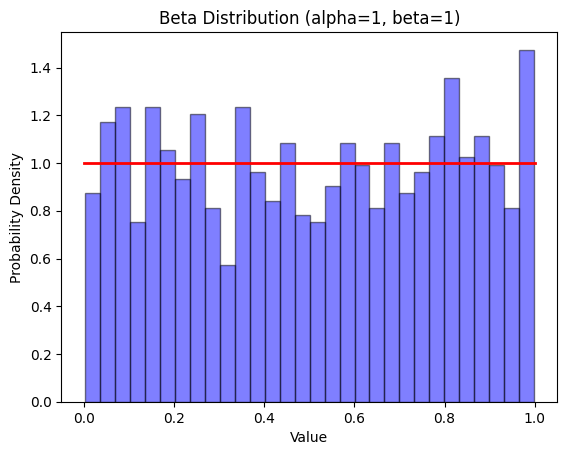

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random samples from a beta distribution with alpha=1 and beta=1
samples = np.random.beta(1, 1, 1000)

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the probability density function (PDF) of the beta distribution
x = np.linspace(0, 1, 100)
pdf = np.power(x, 0) * np.power(1 - x, 0)  # PDF for beta(1, 1)
plt.plot(x, pdf, 'r-', lw=2)

plt.title('Beta Distribution (alpha=1, beta=1)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_40717/2953770518.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  cluster1 = np.random.multivariate_normal(mean1, cov1, 10000)
/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_40717/2953770518.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  cluster2 = np.random.multivariate_normal(mean2, cov2, 10000)


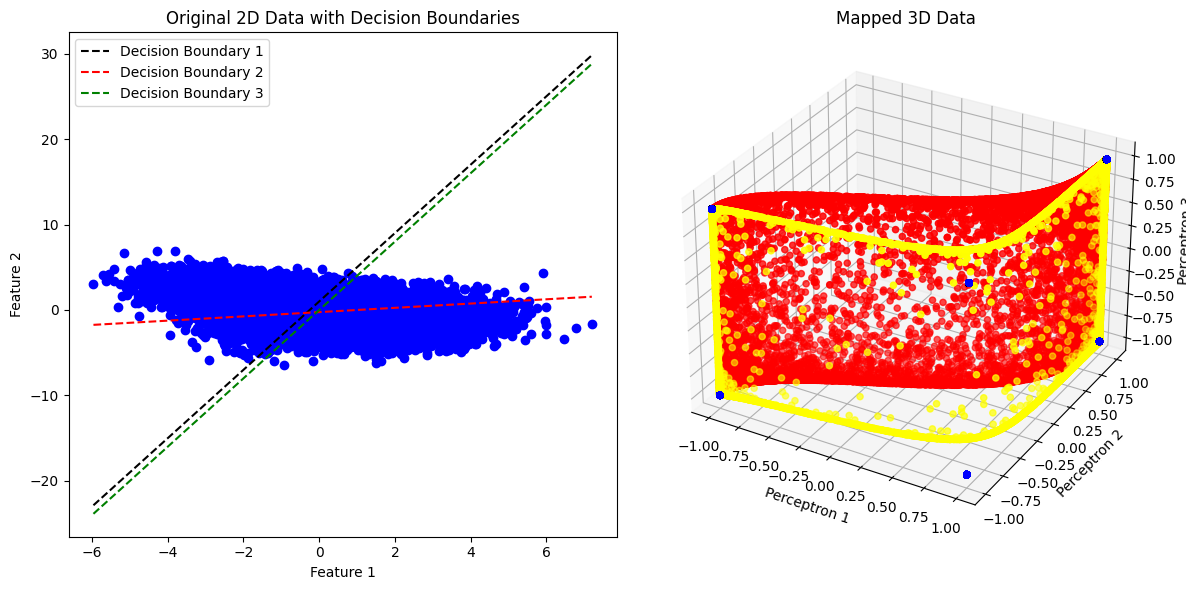

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 두 클러스터 생성
mean1 = [1, -1]
cov1 = [[1, 2], [-2, 1]]
mean2 = [-1, 1]
cov2 = [[2, -1], [1, -2]]

cluster1 = np.random.multivariate_normal(mean1, cov1, 10000)

cluster2 = np.random.multivariate_normal(mean2, cov2, 10000)

  

# 데이터를 하나의 배열로 합치기

data = np.concatenate((cluster1, cluster2), axis=0)

  

x_vec = np.concatenate((np.ones((data.shape[0],1)),data), axis=1)

  

# 퍼셉트론 가중치 및 편향

weights = np.array([[4, -1], [1, -4], [2, -0.5]])

biases = np.array([1, -1, 0])

  

# 3개의 퍼셉트론과 시그모이드 함수로 3차원으로 매핑

mapped_data = np.dot(data, weights.T) + biases

mapped_data_3d = 2 / (1 + np.exp(-mapped_data)) -1

mapped_data_3d_v2 = 2 / (1 + np.exp(-5*mapped_data)) -1

mapped_data_step = np.where(mapped_data >=0, 1, -1 )

mapped_data_relu = np.where(mapped_data >=0, mapped_data,0)
# 시각화

fig = plt.figure(figsize=(12, 6))


# 2차원 데이터

ax1 = fig.add_subplot(121)

ax1.scatter(data[:, 0], data[:, 1], c='blue', marker='o')


# 결정 경계 플로팅

x_vals = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 1000)

y_vals = -(weights[0, 0] * x_vals + biases[0]) / weights[0, 1]

ax1.plot(x_vals, y_vals, color='black', linestyle='--', label='Decision Boundary 1')


y_vals = -(weights[1, 0] * x_vals + biases[1]) / weights[1, 1]

ax1.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary 2')


y_vals = -(weights[2, 0] * x_vals + biases[2]) / weights[2, 1]

ax1.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision Boundary 3')


ax1.set_title('Original 2D Data with Decision Boundaries')

ax1.set_xlabel('Feature 1')

ax1.set_ylabel('Feature 2')

ax1.legend()


# 3차원으로 매핑된 데이터

ax2 = fig.add_subplot(122, projection='3d')

ax2.scatter(mapped_data_3d[:, 0], mapped_data_3d[:, 2], mapped_data_3d[:, 1], c='red', marker='o')

ax2.scatter(mapped_data_3d_v2[:, 0], mapped_data_3d_v2[:, 2], mapped_data_3d_v2[:, 1], c='yellow', marker='o')

ax2.scatter(mapped_data_step[:,0], mapped_data_step[:,2], mapped_data_step[:,1], c='blue', marker='o')

# ax2.scatter(mapped_data_relu[:,1], mapped_data_relu[:,2], mapped_data_relu[:,0], c='green', marker='o')

ax2.set_title('Mapped 3D Data')

ax2.set_xlabel('Perceptron 1')

ax2.set_ylabel('Perceptron 2')

ax2.set_zlabel('Perceptron 3')


plt.tight_layout()

plt.show()